# LSTM

In [1]:
import pandas as pd
import numpy as np
from keras import layers, models, callbacks

2025-02-17 09:55:12.336632: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-17 09:55:12.594479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739760912.700974    4258 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739760912.730849    4258 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 09:55:12.998025: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
df = pd.read_csv("../output/น่าน พิษณุโลก 2558-2563.csv")
print(f"size: {len(df)}")

df["Timestamp"] = pd.to_datetime(df[["Year", "Month", "Day"]]) + pd.to_timedelta(df["Time"], unit="m")
df = df.sort_values("Timestamp").reset_index(drop=True)

size: 79409


In [3]:
features = ["pH", "EC", "Temp"]
target = "DO"

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length][features].values)
        y.append(data.iloc[i + seq_length][target])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10
X, y = create_sequences(df, SEQ_LENGTH)

# train_size = int(len(X) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

X_train, y_train = X, y
X_test, y_test = X_train, y_train

In [4]:
model = models.Sequential([
    layers.Input(shape=(SEQ_LENGTH, len(features))),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(1)
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

I0000 00:00:1739760940.344504    4258 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [5]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)]
)

loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

Epoch 1/100


I0000 00:00:1739760943.688936    4546 cuda_dnn.cc:529] Loaded cuDNN version 90300


2482/2482 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - loss: 3.1064 - mae: 1.2470 - val_loss: 1.5191 - val_mae: 0.9713
Epoch 2/100
2482/2482 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - loss: 1.4582 - mae: 0.9544 - val_loss: 1.4513 - val_mae: 0.9803
Epoch 3/100
2482/2482 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - loss: 1.4060 - mae: 0.9439 - val_loss: 1.3462 - val_mae: 0.9189
Epoch 4/100
2482/2482 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - loss: 1.3527 - mae: 0.9279 - val_loss: 1.2866 - val_mae: 0.8690
Epoch 5/100
2482/2482 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - loss: 1.3097 - mae: 0.9129 - val_loss: 1.2637 - val_mae: 0.8967
Epoch 6/100
2482/2482 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - loss: 1.2771 - mae: 0.9015 - val_loss: 1.2261 - val_mae: 0.8806
Epoch 7/100
2482/2482 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - loss: 1.2544 - mae: 0.8928 - val_loss: 1.1481 - val_mae: 0.8462
Epoch 8/100
2482/2482 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - loss: 1.2097 - mae: 0.8754 - val_loss: 1.1672 - val_mae: 0.8461
Epoch 9/100
2482/2482 ━━━━━━

In [6]:
y_pred = model.predict(X_test)

2482/2482 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


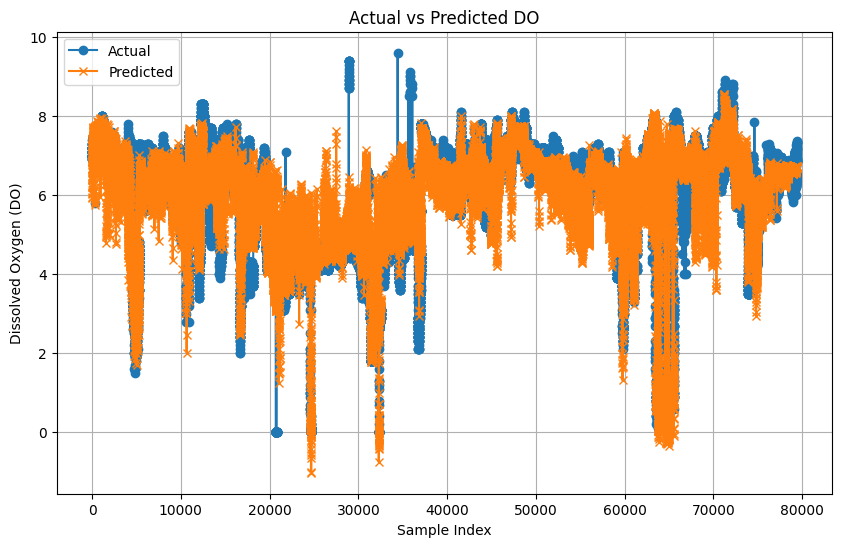

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", marker="o")
plt.plot(y_pred, label="Predicted", marker="x")
plt.xlabel("Sample Index")
plt.ylabel("Dissolved Oxygen (DO)")
plt.title("Actual vs Predicted DO")
plt.legend()
plt.grid(True)
plt.show()